<center> <b> <h1> Absolute permeability of a rock sample </h1> </b> </center>

<h2> 1. Klinkenberg corrected permeability </h2>

#### A flow rate of air fully saturated the porous media of Berea sandstone, under 150 bar of overburden pressure. The data of the experiment will be tested first at Klinkenberg equation.

$$ K_{air}=K_l\left(1+\frac{b}{P_{avg}}\right) $$

#### From the equations below, the permeability of the air ($K_{air}$) and the reciprocal of the average pressure $1/P_{avg}$ will be calculated.

$$ Q_2=\frac{K_{air}A}{2{\mu }_{air}l}\frac{({P_1}^2-{P_2}^2)}{P_2} $$

$$ P_{avg}=\frac{P_1+P_2}{2} $$

#### The five first values of the table will be displayed. The data had been imported from a CSV Excel file.

In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\nikol\OneDrive\Υπολογιστής\Python\Data Analysis with Python\statsmodels\Klinkenberg1.csv")
df.head()

,DP(psia),Q(ml/min)
0,15.0,42
1,17.6,52
2,20.4,61
3,23.3,71
4,25.1,77


In [2]:
import math 

df["Q(ml/sec)"] = df["Q(ml/min)"] / 60
df["P1(atm)"] = df["DP(psia)"] * 0.068045957064302 + 1
df["1/Pavg(1/atm)"] = 2 / (df["P1(atm)"] + 1)
df["Kair(mD)"] = (2000 * df["Q(ml/sec)"] * 0.01844 * 1 * 4.751) / (math.pi * 2.543 ** 2 / 4 * (df["P1(atm)"] ** 2 - 1 ** 2))

df.to_csv("Klinkenberg2.csv", index=False)
df.head()

,DP(psia),Q(ml/min),Q(ml/sec),P1(atm),1/Pavg(1/atm),Kair(mD)
0,15.0,42,0.700000,2.020689,0.662101,7.832344
1,17.6,52,0.866667,2.197609,0.625467,7.807376
2,20.4,61,1.016667,2.388138,0.590295,7.457245
3,23.3,71,1.183333,2.585471,0.557807,7.181183
4,25.1,77,1.283333,2.707954,0.539381,6.990729


#### It is evident, that the Klinkenberg equation fits a linear regression model for the data.

In [3]:
x1 = df["1/Pavg(1/atm)"]
y1 = df["Kair(mD)"]

In [4]:
import statsmodels.api as sm

x1 = sm.add_constant(x1)
model1 = sm.OLS(y1, x1).fit()
yhat = model1.predict(x1)

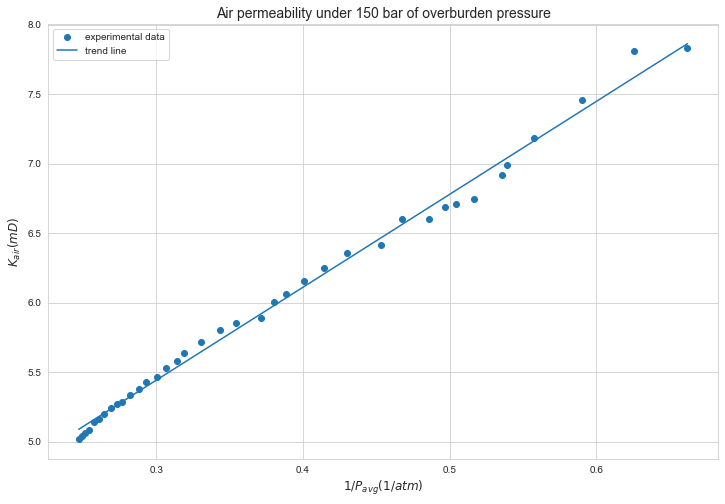

In [5]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_style('whitegrid')
width = 12
height = 8
plt.figure(figsize=(width, height))
plt.xlabel("$1/P_{avg}(1/atm)$", fontsize = 12)
plt.ylabel("$K_{air}(mD)$", fontsize = 12)
plt.title("Air permeability under 150 bar of overburden pressure", fontsize = 14)

plt.scatter(df["1/Pavg(1/atm)"], df["Kair(mD)"], label="experimental data")
plt.plot(df["1/Pavg(1/atm)"], yhat, label="trend line")
plt.legend();

In [6]:
import numpy as np

f = np.polyfit(df["1/Pavg(1/atm)"], df["Kair(mD)"], 1)
p = np.poly1d(f)
print("The linear regression estimator y is", p)

The linear regression estimator y is  
6.687 x + 3.435


In [7]:
print_model = model1.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               Kair(mD)   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     5946.
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           1.42e-41
Time:                        18:24:36   Log-Likelihood:                 51.915
No. Observations:                  38   AIC:                            -99.83
Df Residuals:                      36   BIC:                            -96.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.4350      0.035     98.777

#### The R-squared coefficient approximates the value of 1. That substantiates that the trend line fits the data well. The adjacent R-squared is the same because the regression is linear.

#### $${\boldsymbol{K}}_{\boldsymbol{l}}\boldsymbol{=}{\boldsymbol{3},\boldsymbol{43}}^{\boldsymbol{\ +}}_{\boldsymbol{\ -}}\boldsymbol{\ }\boldsymbol{0},\boldsymbol{03}\boldsymbol{\ }\boldsymbol{mD}$$

#### A data frame of experimental data will be used under 150 bar of overburden pressure.

In [8]:
df2 = pd.read_csv(r"C:\Users\nikol\OneDrive\Υπολογιστής\Python\Data Analysis with Python\statsmodels\second order slip equation1.csv")
df2.head()

,DP(psia),Q(ml/min)
0,5.4,120.0
1,6.6,151.0
2,7.5,173.0
3,8.4,197.0
4,9.5,225.0


In [9]:
df2["Q(ml/sec)"] = df2["Q(ml/min)"] / 60
df2["P1(atm)"] = df2["DP(psia)"] * 0.068045957064302 + 1
df2["1/Pavg(1/atm)"] = 2 / (df2["P1(atm)"] + 1)
df2["Kair(mD)"] = (2000 * df2["Q(ml/sec)"] * 0.01844 * 1 * 4.751) / (math.pi * 2.543 ** 2 / 4 * (df2["P1(atm)"] ** 2 - 1 ** 2))

df2.to_csv("second order slip equation2.csv", index=False)
df2.head()

,DP(psia),Q(ml/min),Q(ml/sec),P1(atm),1/Pavg(1/atm),Kair(mD)
0,5.4,120.0,2.000000,1.367448,0.844791,79.313437
1,6.6,151.0,2.516667,1.449103,0.816625,78.934283
2,7.5,173.0,2.883333,1.510345,0.796703,77.641023
3,8.4,197.0,3.283333,1.571586,0.777730,77.059404
4,9.5,225.0,3.750000,1.646437,0.755733,75.620089


<li><b>The data fit the second order slip equation and the Klinkenberg as well. As it is conspicuous from the graphs bellow, the reciprocal pressure range, has been limited and it is not clear because of the experimental limitations, witch regression model fits the data. The first equation is the generalized air flow predictor and coincide with the second, when the slip flow of the molecules on the capillary wall is insignificant. This time the statistical table will be used more extensively to evaluate, if the data are sufficient to predict the corrected permeability from the quadratic regression model. The second order slip equation is:
</b></li>

$$K_{air}=K_l\left(1+A\frac{1}{P_{avg}}+B\frac{1}{{P_{avg}}^2}\right)$$

In [10]:
x2 = df2["1/Pavg(1/atm)"]
y2 = df2["Kair(mD)"]

inds = x2.ravel().argsort()   
x2 = x2.ravel()[inds].reshape(-1,1)
y2 = y2[inds] 

In [11]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=2)
xp2 = polynomial_features.fit_transform(x2)

In [12]:
model2 = sm.OLS(y2, xp2).fit()
ypred = model2.predict(xp2)

In [13]:
x3 = df2["1/Pavg(1/atm)"]
y3 = df2["Kair(mD)"]

x3 = sm.add_constant(x3)
model3 = sm.OLS(y3, x3).fit()
yhat2 = model3.predict(x3)

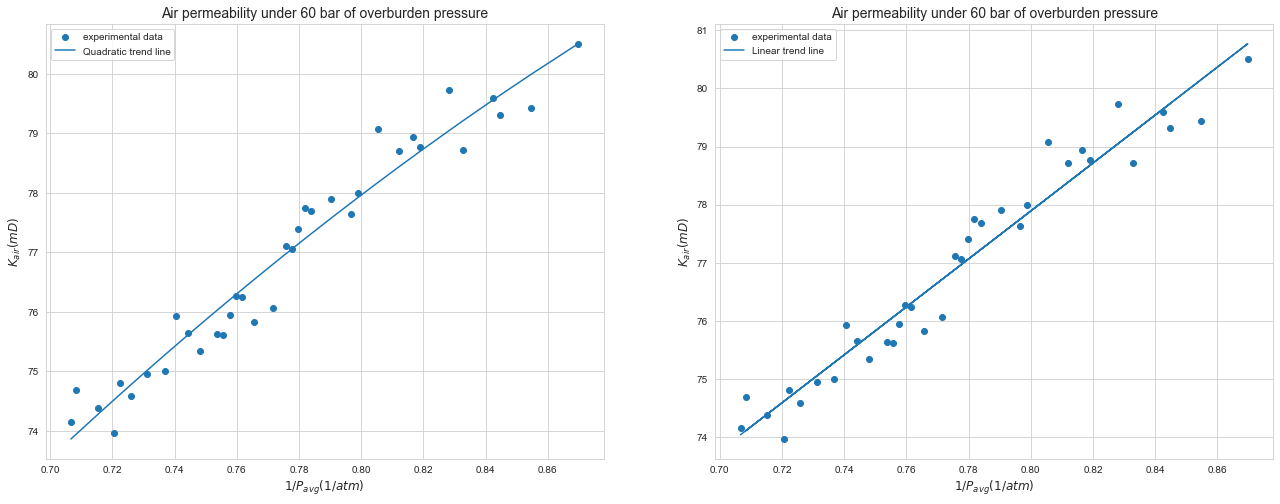

In [14]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 22, 8
plt.figure()

plt.subplot(1,2,1)
plt.scatter(x2, y2, label="experimental data")
plt.plot(x2, ypred, label="Quadratic trend line")
plt.xlabel("$1/P_{avg}(1/atm)$", fontsize = 12)
plt.ylabel("$K_{air}(mD)$", fontsize = 12)
plt.title("Air permeability under 60 bar of overburden pressure", fontsize = 14)
plt.legend();

plt.subplot(1,2,2)
plt.scatter(df2["1/Pavg(1/atm)"],  df2["Kair(mD)"], label="experimental data")
plt.plot(df2["1/Pavg(1/atm)"], yhat2, label="Linear trend line")
plt.xlabel("$1/P_{avg}(1/atm)$", fontsize = 12)
plt.ylabel("$K_{air}(mD)$", fontsize = 12)
plt.title("Air permeability under 60 bar of overburden pressure", fontsize = 14)
plt.legend();

#### The predictor y of the quadratic line equation equals:

In [15]:
f = np.polyfit(df2["1/Pavg(1/atm)"], df2["Kair(mD)"], 2)
p = np.poly1d(f)
print(p)

        2
-45.81 x + 113 x + 16.92


In [16]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               Kair(mD)   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     320.4
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           2.43e-22
Time:                        18:24:37   Log-Likelihood:                -18.475
No. Observations:                  36   AIC:                             42.95
Df Residuals:                      33   BIC:                             47.70
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.9162     21.859      0.774      0.4

<ul>
<li><b>The R-squared coefficient approximates the value of 1. That substantiates that the trend line fits the data well. The adjacent R-squared is slightly smaller than R-squared, because the quadratic trend line fits the data as well.</b></li>
<li><b>The P-value of the F-test is almost 0, so we reject the null hypothesis, that the model with no independent variables fits the data as well as the model, as it is obvious and additionally the probability that the polynomial of second degree fits the data by chance equals with the P-value.</b></li>
<li><b>The standard error of the coefficients are very large. Only the p-value of x1 on t-test is mild larger than alpha=0.05, but the standard error remain half the mean value. The same can be stated for the coefficients values within 95% of interval confidence.</b></li>
<li><b> A large condition number implies a strong trend of multicollinearity, as can been seen in the figures.
</ul>

#### In summary, the regression results state, that the quadratic trend line fits the data well, but the uncertainty of the coefficients upsurge as the multicollinearity strengthens.

In [17]:
print("The standard error of the y estimate is", np.sqrt(model2.scale), "mD")

The standard error of the y estimate is 0.4222172860759531 mD


#### $${\boldsymbol{K}}_{\boldsymbol{l}}\boldsymbol{=}{\boldsymbol{16},\boldsymbol{9}\boldsymbol{1}\boldsymbol{\ }}^{\boldsymbol{+}}_{\boldsymbol{-}}\boldsymbol{\ }\boldsymbol{0}.\boldsymbol{42}\boldsymbol{\ }\boldsymbol{mD}$$

#### <b>The small value of the standard error, of the estimator confirm the statistic table, that the fit is valid if the order of the regression model is known beforehand.</b>

<h2> 2. Permeability of water </h2>

#### The pressure of water flow requires 1200 min, only for two values to be approximately stabilized, when the flow rate is small under 60 bar of overburden pressure. From Darcy's law, the water permeability ($K_w$) will be calculated from the pressure values

$$K_w=\frac{Q{\mu }_wL}{A\mathit{\Delta}P}$$ 

In [18]:
df3 = pd.read_csv(r"C:\Users\nikol\OneDrive\Υπολογιστής\Python\Data Analysis with Python\statsmodels\proxeiro2.csv")
df3.head()

,DP1(atm),DP2(atm)
0,9.14,8.57
1,9.09,8.53
2,9.13,8.56
3,9.09,8.55
4,9.10,8.52


In [19]:
df3["Kw1(mD)"] = 1000 * 4 / 60 * 1 * 4.751 / (math.pi * 2.543 ** 2 / 4 * df3["DP1(atm)"])
df3["Kw2(mD)"] = 1000 * 3.5 / 60 * 1 * 4.751 / (math.pi * 2.543 ** 2 / 4 * df3["DP2(atm)"])

df3.to_csv('water permeability.csv', index=False)

In [20]:
df3.head()

,DP1(atm),DP2(atm),Kw1(mD),Kw2(mD)
0,9.14,8.57,6.822837,6.367052
1,9.09,8.53,6.860366,6.396909
2,9.13,8.56,6.830310,6.374490
3,9.09,8.55,6.860366,6.381946
4,9.10,8.52,6.852827,6.404417


Text(0, 0.5, 'probability density function')

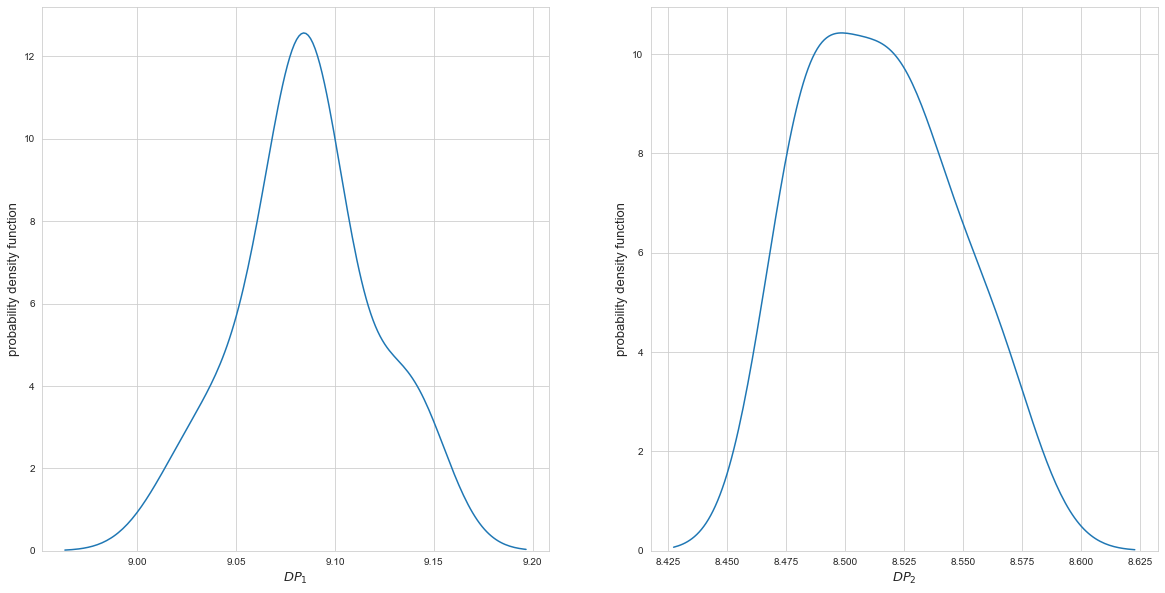

In [21]:
import seaborn as sns

fig, axes = plt.subplots(figsize=(20,10), ncols=2, nrows=1)

p = sns.kdeplot(df3['DP1(atm)'], ax=axes[0])
p.set_xlabel("$DP_{1}$", fontsize = 13)
p.set_ylabel("probability density function", fontsize = 13)

n = sns.kdeplot(df3['DP2(atm)'], ax=axes[1])
n.set_xlabel("$DP_{2}$", fontsize = 13)
n.set_ylabel("probability density function", fontsize = 13)

#### From the figures of the probability density function, it is crystal clear that the stabilized pressures are normally distributed. The mean values, standard deviation and the median of the quadrilles are displayed in the table below.

In [22]:
df3.describe()

,DP1(atm),DP2(atm),Kw1(mD),Kw2(mD)
count,16.000000,15.000000,16.000000,15.000000
mean,9.085625,8.514667,6.863754,6.408504
std,0.032857,0.030206,0.024825,0.022707
min,9.020000,8.480000,6.822837,6.367052
25%,9.077500,8.485000,6.858481,6.396909
50%,9.085000,8.510000,6.864144,6.411943
75%,9.092500,8.530000,6.869815,6.430837
max,9.140000,8.570000,6.913606,6.434627


#### Conducting a t-test at a 99% confidence level for DP1:

In [23]:
import scipy.stats as stats
import math

sigma_DP1 = df3["DP1(atm)"].std() / math.sqrt(df3["DP1(atm)"].count())
stats.t.interval(0.99, df=df3["DP1(atm)"].count() - 1, loc=df3["DP1(atm)"].mean(), scale=sigma_DP1)

(9.061419953784334, 9.109830046215666)

In [24]:
σ_DP1 = df3["DP1(atm)"].mean() - 9.061419953784334
print("The standard deviation of DP1 is", σ_DP1, "atm")

The standard deviation of DP1 is 0.024205046215666215 atm


In [25]:
print("The difference between the sample and t-test's standard deviation is", df3["DP1(atm)"].std() - σ_DP1, "atm")

The difference between the sample and t-test's standard deviation is 0.008651967241636166 atm


#### Following the same procedure for DP2:

In [26]:
sigma_DP2 = df3["DP2(atm)"].std() / math.sqrt(df3["DP2(atm)"].count())
stats.t.interval(0.99, df=df3["DP2(atm)"].count() - 1, loc=df3["DP2(atm)"].mean(), scale=sigma_DP2)

(8.491450080133093, 8.53788325320024)

In [27]:
σ_DP2 = df3["DP2(atm)"].mean() - 8.491450080133093
print("The standard deviation of DP2 is", σ_DP2, "atm")

The standard deviation of DP2 is 0.02321658653357339 atm


In [28]:
print("The difference between the sample and t-test's standard deviation is", df3["DP2(atm)"].std() - σ_DP2, "atm")

The difference between the sample and t-test's standard deviation is 0.006989057845928733 atm


$${\mathit{D}P}_1={9.086\ }^+_-\ 0.024\ atm$$ 
$${\mathit{D}P}_2={8.515\ }^+_-\ 0.023\ atm$$

#### From Darcy's law, the water permeability ($K_w$) will be calculated from the pressure values.

In [29]:
K_w1 = df3["Kw1(mD)"].mean()
print("The first stabilized value of water permeability is", K_w1, "mD")

The first stabilized value of water permeability is 6.86375364495948 mD


In [30]:
K_w2 = df3["Kw2(mD)"].mean()
print("The second stabilized value of water permeability is", K_w2, "mD")

The second stabilized value of water permeability is 6.408504104411152 mD


$$K_{w1}=6,86\ mD$$ 
$$K_{w2}=\ 6,41\ mD$$ 

<b>
The difference in water permeability is not caused by measurement error, because the error of pressure is very small. It can be clearly seen that, when the flow rate of the measurements is greater, under 150 bar overburden pressure. This is due to the electroosmotic phenomena, namely the electrostatic interaction between the clay particles of the rock and the polar fluids, like water. The fluid is characterized by plastic behaviour. Specifically, the fluid needs a threshold pressure, for the flow to initiate. The maximum permeability of the plastic flow equals the intrinsic permeability of the rock when the electroosmotic phenomena become negligible. The absolute permeability will be calculated from the Buckingham-Reiner equation.
</b>

$$K_w\left(\mathit{D}P\right)=\frac{\mathit{\Phi}R^2}{8}\left[1-\frac{4}{3}\left(\frac{2L{\tau }}{R\mathit{D}P}\right)+\frac{1}{3}{\left(\frac{2L{\tau }}{R\mathit{D}P}\right)}^4\right]$$

##### Setting $x=\frac{\tau }{R}$ and dividing $K_{w1}({\mathit{D}P}_1)$ by $K_{w2}({\mathit{D}P}_2):$

$$ax^4+bx+c=0$$

$$a=\frac{16}{3}L^4\left(\frac{K_{w2}}{{{\mathit{D}P}_1}^4}-\frac{K_{w1}}{{{\mathit{D}P}_2}^4}\right),\ \ b=\frac{8}{3}L\left(\frac{K_{w1}}{{\mathit{D}P}_2}-\frac{K_{w2}}{{\mathit{D}P}_1}\right),\ \ c=K_{w2}-K_{w1}$$

In [31]:
a = 16 / 3 * 0.04751 ** 4 * (df3["Kw2(mD)"].mean() * 9.86923266716 * 10 ** -16 / (df3["DP1(atm)"].mean() * 101325) ** 4 - df3["Kw1(mD)"].mean() *
    9.86923266716 * 10 ** -16 / (df3["DP2(atm)"].mean() * 101325) ** 4) * 10 ** 16

In [32]:
b = 8 / 3 * 0.04751 * (df3["Kw1(mD)"].mean() * 9.86923266716 * (10 ** -16) / (df3["DP2(atm)"].mean() * 101325) - df3["Kw2(mD)"].mean() *
    9.86923266716 * (10 ** -16) / (df3["DP1(atm)"].mean() * 101325)) * 10 ** 16

In [33]:
c = (df3["Kw2(mD)"].mean() * 9.86923266716 * 10 ** -16 - df3["Kw1(mD)"].mean() * 9.86923266716 * 10 ** -16) * 10 ** 16

#### The root of $f(x)=ax^4+bx+c$ will be calculated from Newton-Raphson method. Defining Equation and Derivative:

In [34]:
def f(x):
    res = a * x ** 4 + b * x + c
    return res
 
def dfdx(x):
    res = 4 * a * x ** 3 + b
    return res

#### A value is set for the maximum number of iterations, the decimal tolerance, the iteration counter and the initial guess for the root. The algorithm will be iterated until either the tolerance or the maximum number of iterations is met.

In [35]:
max_iter = 100 
tol = 1E-15  
i = 0  
x0 = 5E+06  
xi_1 = x0

print("Iteration " + str(i) + ": x = " + str(x0) + ", f(x) = " + str(f(x0)))
while abs(f(xi_1)) > tol or i > max_iter:
    i = i + 1
    xi = xi_1-f(xi_1)/dfdx(xi_1)  
    print("Iteration " + str(i) + ": x = " + str(xi) + ", f(x) = " +  str(f(xi)))
    xi_1 = xi

Iteration 0: x = 5000000.0, f(x) = 1.1432346894191259
Iteration 1: x = 3531729.814711351, f(x) = -0.24608685613283132
Iteration 2: x = 3759664.7992286063, f(x) = -0.0037726308696868216
Iteration 3: x = 3763272.1100701713, f(x) = -1.0266121677204865e-06
Iteration 4: x = 3763273.0922299875, f(x) = -7.638334409421077e-14
Iteration 5: x = 3763273.0922300606, f(x) = 0.0


#### The radius of the capillaries will be calculated from the Buckingham-Reiner equation.

In [36]:
R = np.sqrt( 8 * (df3["Kw2(mD)"].mean() * 9.86923266716 * 10 ** - 16) / (0.183154 * (1 - 4 / 3 * (2 * 0.04751 * xi / (df3["DP2(atm)"].mean() *
    101325)) + 1 / 3 * (2 * 0.04751 * xi / (df3["DP2(atm)"].mean() * 101325)) ** 4))) * 10 ** 6
print("The radius of the capillaries is", R, "μm")

The radius of the capillaries is 0.7773217663428579 μm


#### The threshold shear stress between the layers of water for the flow to be initiated:

In [37]:
τ = R * 10 ** -6 * xi
print("The threshold shear stress equals", τ, "Pa")

The threshold shear stress equals 2.9252740872828196 Pa


$$K_{max}={\mathop{lim}_{\mathit{\Delta}P\to \infty } K_w\left(\mathit{\Delta}P\right)\ }=\frac{\mathit{\Phi}R^2}{8}$$

In [38]:
K_max = (R * 10 ** -6) ** 2 * 0.183154 / 8 * 1.01325 * 10 ** 15
print("The maximum permeability of water is", K_max, "mD")

The maximum permeability of water is 14.016664912154507 mD


#### $${\boldsymbol{K}}_{\boldsymbol{max}}\boldsymbol{=}\boldsymbol{14}.\boldsymbol{02}\boldsymbol{\ }\boldsymbol{mD}$$

In [39]:
df4 = pd.read_csv(r"C:\Users\nikol\OneDrive\Υπολογιστής\Python\Data Analysis with Python\statsmodels\B-R@60bar.csv")
df4.head()

,DP(atm),Kw(mD)
0,5.0,2.02
1,5.5,2.85
2,6.0,3.61
3,6.5,4.30
4,7.0,4.91


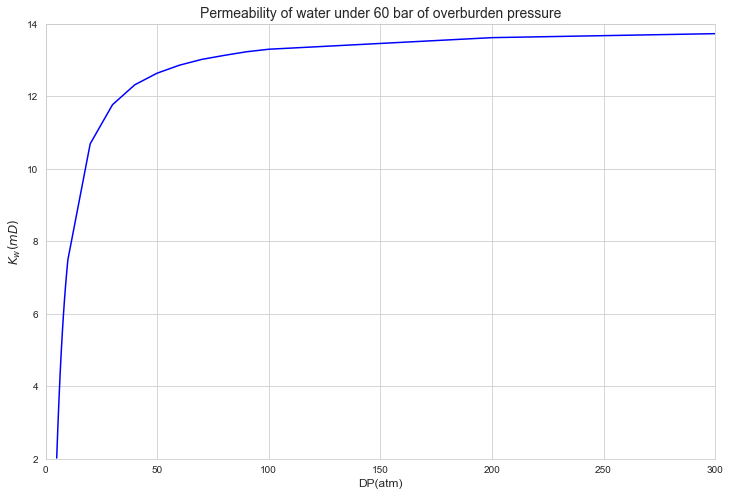

In [40]:
width = 12
height = 8
plt.figure(figsize=(width, height))

plt.xlabel("DP(atm)", fontsize = 12)
plt.ylabel("$K_{w}(mD)$", fontsize = 12)
plt.ylim((2,14))
plt.xlim((0,300))
plt.title("Permeability of water under 60 bar of overburden pressure", fontsize = 14)

plt.plot(df4["DP(atm)"], df4["Kw(mD)"], "b")

#### From the figure, is clearly, that the permeability of water reaches a plateau. Given an infinite value for the differential pressure, the permeability line meets the plateau at 14.02 mD.

#### The pressure of water when the flow rate is bigger, under 150 bar of overburden pressure, stabilized completely and the values were much more. That will allow the experimental data to be compared with the Buckingham-Reiner line. Consequently, when the flow rate is decreased, the values stabilized also, very quickly.

In [41]:
df5 = pd.read_csv(r"C:\Users\nikol\OneDrive\Υπολογιστής\Python\Data Analysis with Python\statsmodels\water permeability 2.csv")
df5

,DP(atm),Kw(mD)
0,90.8,1.20
1,80.9,1.16
2,68.1,1.14
3,55.3,1.13
4,44.4,1.05
5,32.6,0.96
6,20.2,0.77
7,13.3,0.59


#### The same procedure will be followed as well.

$$K_{w1}=0.59\ mD$$ 
$$K_{w2}=\ 1.20\ mD$$ 

In [42]:
K_w2 = df5.iat[0,1]
DP_2 = df5.iat[0,0]

K_w1 = df5.iat[7,1]
DP_1 = df5.iat[7,0]

In [43]:
a = 16 / 3 * 0.04751 ** 4 * (K_w2 * 9.86923266716 * 10 ** -16 / (DP_1*101325) ** 4 - K_w1 * 9.86923266716 * 10 ** -16 / (DP_2 * 101325)
    ** 4) * 10 ** 16

In [44]:
b = 8 / 3 * 0.04751 * (K_w1 * 9.86923266716 * (10 ** -16) / (DP_2 * 101325) - K_w2 * 9.86923266716 * (10 ** -16) / (DP_1 * 101325)) * 10 ** 16

In [45]:
c = (K_w2 * 9.86923266716 * 10 ** -16 - K_w1 * 9.86923266716 * 10 ** -16) * 10 ** 16

In [46]:
def f(x):
    res = a * x ** 4 + b * x + c
    return res
 
def dfdx(x):
    res = 4 * a * x ** 3 + b
    return res

In [47]:
max_iter = 100 
tol = 1E-15  
i = 0  
x0 = 6E+06  
xi_1 = x0

print("Iteration " + str(i) + ": x = " + str(x0) + ", f(x) = " + str(f(x0)))
while abs(f(xi_1)) > tol or i > max_iter:
    i = i + 1
    xi = xi_1-f(xi_1)/dfdx(xi_1)  
    print("Iteration " + str(i) + ": x = " + str(xi) + ", f(x) = " + str(f(xi)))
    xi_1 = xi

Iteration 0: x = 6000000.0, f(x) = -0.05262245374993224
Iteration 1: x = 5944545.4423180735, f(x) = 6.439948520320371e-05
Iteration 2: x = 5944613.142546746, f(x) = 9.479883544827317e-11
Iteration 3: x = 5944613.142646404, f(x) = 8.881784197001252e-16


In [48]:
R = np.sqrt(8 * (K_w2 * 9.86923266716 * 10 ** -16) / ( 0.183154 * (1 - 4 / 3 * (2 * 0.04751 * xi / (DP_2 * 101325)) + 1 / 3 * (2 * 0.04751 * xi / 
    (DP_2 * 101325)) ** 4))) * 10 ** 6
print("The radius of the capillaries is", R, "μm")

The radius of the capillaries is 0.2373633555318724 μm


In [49]:
τ = R * 10 ** -6 * xi
print("The threshold shear stress equals", τ, "Pa")

The threshold shear stress equals 1.4110333228774197 Pa


In [50]:
K_max = (R * 10 ** -6) ** 2 * 0.183154 / 8 * 1.01325 * 10 ** 15
print("The maximum permeability of water is", K_max, "mD")

The maximum permeability of water is 1.3069843249694348 mD


#### $${\boldsymbol{K}}_{\boldsymbol{max}}\boldsymbol{=}\boldsymbol{1}.\boldsymbol{31}\boldsymbol{\ }\boldsymbol{mD}$$

#### Creating a data frame from the Buckingham-Reiner equation:

In [51]:
df6 = pd.read_csv(r"C:\Users\nikol\OneDrive\Υπολογιστής\Python\Data Analysis with Python\statsmodels\B-R@150bar.csv")
df6.head()

,DP(atm),Kw(mD)
0,10,0.37
1,20,0.82
2,30,0.98
3,40,1.06
4,50,1.11


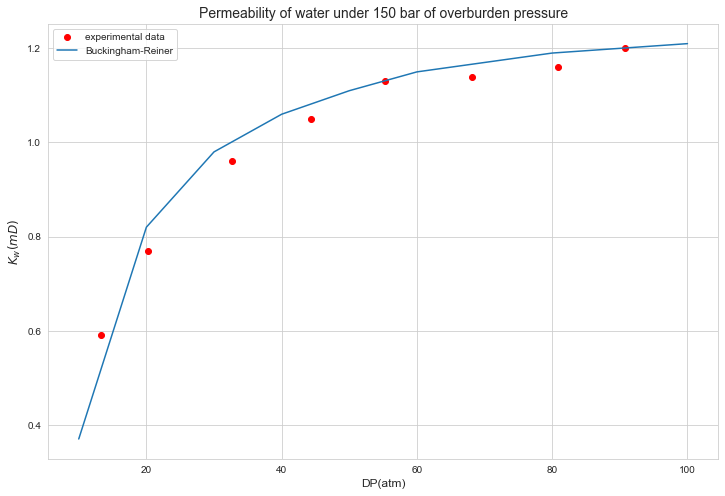

In [52]:
width = 12
height = 8
plt.figure(figsize=(width, height))

plt.xlabel("DP(atm)", fontsize = 12)
plt.ylabel("$K_{w}(mD)$", fontsize = 12)
plt.title("Permeability of water under 150 bar of overburden pressure", fontsize = 14)

plt.scatter(df5["DP(atm)"], df5["Kw(mD)"], c ="red", label="experimental data")
plt.plot(df6["DP(atm)"], df6["Kw(mD)"], label="Buckingham-Reiner")
plt.legend();

<b>
As it is apparent from the figure, the experimental data are in close vicinity to the Buckingham-Reiner line. Finally, it is important to be noted, that the corrected air permeability and the maximum permeability of the plastic flow, under the same overburden pressure are very close to each other. So, it can be concluded, that they are consistent with the absolute permeability of the sandstone.
</b>